<a href="https://colab.research.google.com/github/kaindoh/Ecommerce-Customer-Service/blob/master/Ecommerce_Customers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading the Libraries

In [0]:
library(DataExplorer)

In [0]:
# Importing libaries

library(tidyverse)

Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.2.1       v purrr   0.3.3  
v tibble  2.1.3       v dplyr   0.8.0.1
v tidyr   0.8.3       v stringr 1.4.0  
v readr   1.3.1       v forcats 0.4.0  
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


In [0]:
library(graphics)

In [0]:
library(ggplot2)

In [0]:
library(ggcorrplot)

In [0]:
library(caret)

Loading required package: lattice

Attaching package: 'caret'

The following object is masked from 'package:purrr':

    lift



In [0]:
library(magrittr)


Attaching package: 'magrittr'

The following object is masked from 'package:purrr':

    set_names

The following object is masked from 'package:tidyr':

    extract



In [0]:
library(gridExtra)
library(GGally)
library(cluster)
library(factoextra)


Attaching package: 'gridExtra'

The following object is masked from 'package:dplyr':

    combine

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

Attaching package: 'GGally'

The following object is masked from 'package:dplyr':

    nasa

Welcome! Related Books: `Practical Guide To Cluster Analysis in R` at https://goo.gl/13EFCZ


In [0]:
library(data.table)
library(mltools)


Attaching package: 'data.table'

The following objects are masked from 'package:dplyr':

    between, first, last

The following object is masked from 'package:purrr':

    transpose


Attaching package: 'mltools'

The following object is masked from 'package:tidyr':

    replace_na



In [0]:
library(Rtsne)

In [0]:
library(devtools)

Loading required package: usethis


In [0]:
library(ggbiplot)

Loading required package: plyr
------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: 'plyr'

The following objects are masked from 'package:dplyr':

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from 'package:purrr':

    compact

Loading required package: scales

Attaching package: 'scales'

The following object is masked from 'package:purrr':

    discard

The following object is masked from 'package:readr':

    col_factor

Loading required package: grid


# Loading The Online Shopping Dataset

In [0]:
# Loading the dataset and displaying the first 6 rows

df = read.csv("online_shoppers_intention.csv")
head(df) 

Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0,0,1,0.000000,0.20000000,0.2000000,0,0,Feb,1,1,1,1,Returning_Visitor,FALSE,FALSE
0,0,0,0,2,64.000000,0.00000000,0.1000000,0,0,Feb,2,2,1,2,Returning_Visitor,FALSE,FALSE
0,-1,0,-1,1,-1.000000,0.20000000,0.2000000,0,0,Feb,4,1,9,3,Returning_Visitor,FALSE,FALSE
0,0,0,0,2,2.666667,0.05000000,0.1400000,0,0,Feb,3,2,2,4,Returning_Visitor,FALSE,FALSE
0,0,0,0,10,627.500000,0.02000000,0.0500000,0,0,Feb,3,3,1,4,Returning_Visitor,TRUE,FALSE
0,0,0,0,19,154.216667,0.01578947,0.0245614,0,0,Feb,2,2,1,3,Returning_Visitor,FALSE,FALSE


# Getting the information of the Dataset

In [0]:
# Getting the column names

attributes(df)$names

[1] "Administrative"          "Administrative_Duration"
 [3] "Informational"           "Informational_Duration" 
 [5] "ProductRelated"          "ProductRelated_Duration"
 [7] "BounceRates"             "ExitRates"              
 [9] "PageValues"              "SpecialDay"             
[11] "Month"                   "OperatingSystems"       
[13] "Browser"                 "Region"                 
[15] "TrafficType"             "VisitorType"            
[17] "Weekend"                 "Revenue"

In [0]:
# Getting the class ofthe data

attributes(df)$class

[1] "data.frame"

In [0]:
# Getting the data type of the individual column

glimpse(df)

Observations: 12,330
Variables: 18
$ Administrative          <int> 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0...
$ Administrative_Duration <dbl> 0, 0, -1, 0, 0, 0, -1, -1, 0, 0, 0, 0, 0, 0...
$ Informational           <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...
$ Informational_Duration  <dbl> 0, 0, -1, 0, 0, 0, -1, -1, 0, 0, 0, 0, 0, 0...
$ ProductRelated          <int> 1, 2, 1, 2, 10, 19, 1, 1, 2, 3, 3, 16, 7, 6...
$ ProductRelated_Duration <dbl> 0.000000, 64.000000, -1.000000, 2.666667, 6...
$ BounceRates             <dbl> 0.200000000, 0.000000000, 0.200000000, 0.05...
$ ExitRates               <dbl> 0.200000000, 0.100000000, 0.200000000, 0.14...
$ PageValues              <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...
$ SpecialDay              <dbl> 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.4, 0.0, 0.8...
$ Month                   <fct> Feb, Feb, Feb, Feb, Feb, Feb, Feb, Feb, Feb...
$ OperatingSystems        <int> 1, 2, 4, 3, 3, 2, 2, 1, 2, 2, 1, 1, 1, 2, 3...
$ Browser        

In [0]:
# Checking the unique values of columns that are factors 

fac.columns <- c('Month','VisitorType')
no <- function(x) {  
    levels(x)
  }
  
number <- sapply(select(df, fac.columns), no)
number

$Month
 [1] "Aug"  "Dec"  "Feb"  "Jul"  "June" "Mar"  "May"  "Nov"  "Oct"  "Sep" 

$VisitorType
[1] "New_Visitor"       "Other"             "Returning_Visitor"

The month of April and January are not there

In [0]:
# Checking the unique values of columns that are numerical 

num.columns <- c('Administrative','Informational','SpecialDay','OperatingSystems','Browser','Region','TrafficType','Weekend','Revenue')
no <- function(x) {  
    unique(x)
  }
  
number <- sapply(select(df, num.columns), no)
number

$Administrative
 [1]  0  1  2  4 12  3 10  6  5  9  8 16 13 11  7 18 14 17 19 15 NA 24 22 21 20
[26] 23 27 26

$Informational
 [1]  0  1  2  4 16  5  3 14  6 12  7 NA  9 10  8 11 24 13

$SpecialDay
[1] 0.0 0.4 0.8 1.0 0.2 0.6

$OperatingSystems
[1] 1 2 4 3 7 6 8 5

$Browser
 [1]  1  2  3  4  5  6  7 10  8  9 12 13 11

$Region
[1] 1 9 2 3 4 5 6 7 8

$TrafficType
 [1]  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 18 19 16 17 20

$Weekend
[1] FALSE  TRUE

$Revenue
[1] FALSE  TRUE

In [0]:
# This the shape of the dataset

dim(df)

[1] 12330    18

we have 12330 rows and 18 columns

In [0]:
# Summary of numeric columns

df %>%
  select_if(is.numeric) %>%
  map(~summary(.))

$Administrative
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  0.000   0.000   1.000   2.318   4.000  27.000      14 

$Administrative_Duration
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  -1.00    0.00    8.00   80.91   93.50 3398.75      14 

$Informational
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  0.000   0.000   0.000   0.504   0.000  24.000      14 

$Informational_Duration
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  -1.00    0.00    0.00   34.51    0.00 2549.38      14 

$ProductRelated
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   0.00    7.00   18.00   31.76   38.00  705.00      14 

$ProductRelated_Duration
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   -1.0   185.0   599.8  1196.0  1466.5 63973.5      14 

$BounceRates
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max.     NA's 
0.000000 0.000000 0.003119 0.022152 0.016684 0.200000       14 

$ExitRates
   Min. 1st Qu.  Median    Mean 3rd 

# Data Cleaning

In [0]:
# Checking for missing values
colSums(is.na(df))

Administrative Administrative_Duration           Informational 
                     14                      14                      14 
 Informational_Duration          ProductRelated ProductRelated_Duration 
                     14                      14                      14 
            BounceRates               ExitRates              PageValues 
                     14                      14                       0 
             SpecialDay                   Month        OperatingSystems 
                      0                       0                       0 
                Browser                  Region             TrafficType 
                      0                       0                       0 
            VisitorType                 Weekend                 Revenue 
                      0                       0                       0

In [0]:
# Dealing with missing values

df = na.omit(df)
print("The shape of the dataset is : ")
print(dim(df))
cat("\n")
print("There are no missing vallues")
colSums(is.na(df))

[1] "The shape of the dataset is : "
[1] 12316    18

[1] "There are no missing vallues"


Administrative Administrative_Duration           Informational 
                      0                       0                       0 
 Informational_Duration          ProductRelated ProductRelated_Duration 
                      0                       0                       0 
            BounceRates               ExitRates              PageValues 
                      0                       0                       0 
             SpecialDay                   Month        OperatingSystems 
                      0                       0                       0 
                Browser                  Region             TrafficType 
                      0                       0                       0 
            VisitorType                 Weekend                 Revenue 
                      0                       0                       0

The shape of daraset did not change as muchafter dropping null values becauses it moves from 12330 to 12316    

In [0]:
# Checking for duplicates

anyDuplicated(df)

[1] 159

In [0]:
# Dropping the duplicates

df <- df[!duplicated(df),]
anyDuplicated(df)

[1] 0

Duplicates have been dropped from 159 duplicates to 0 duplicates

In [0]:
# Changing the names of the columns to lower

colnames(df) <- tolower(colnames(df))
colnames(df)

[1] "administrative"          "administrative_duration"
 [3] "informational"           "informational_duration" 
 [5] "productrelated"          "productrelated_duration"
 [7] "bouncerates"             "exitrates"              
 [9] "pagevalues"              "specialday"             
[11] "month"                   "operatingsystems"       
[13] "browser"                 "region"                 
[15] "traffictype"             "visitortype"            
[17] "weekend"                 "revenue"

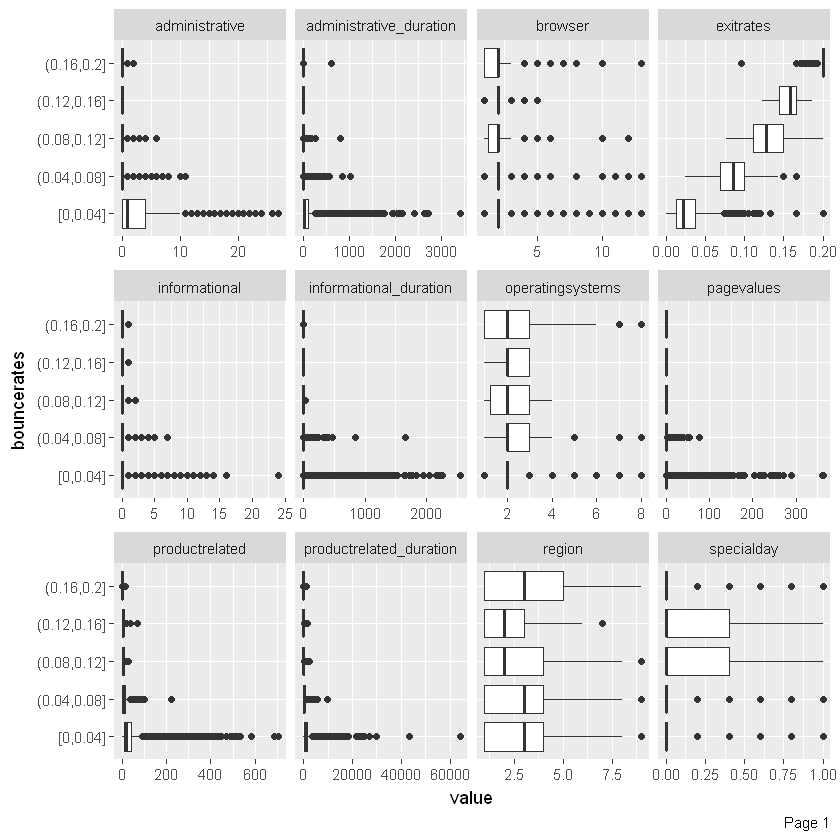

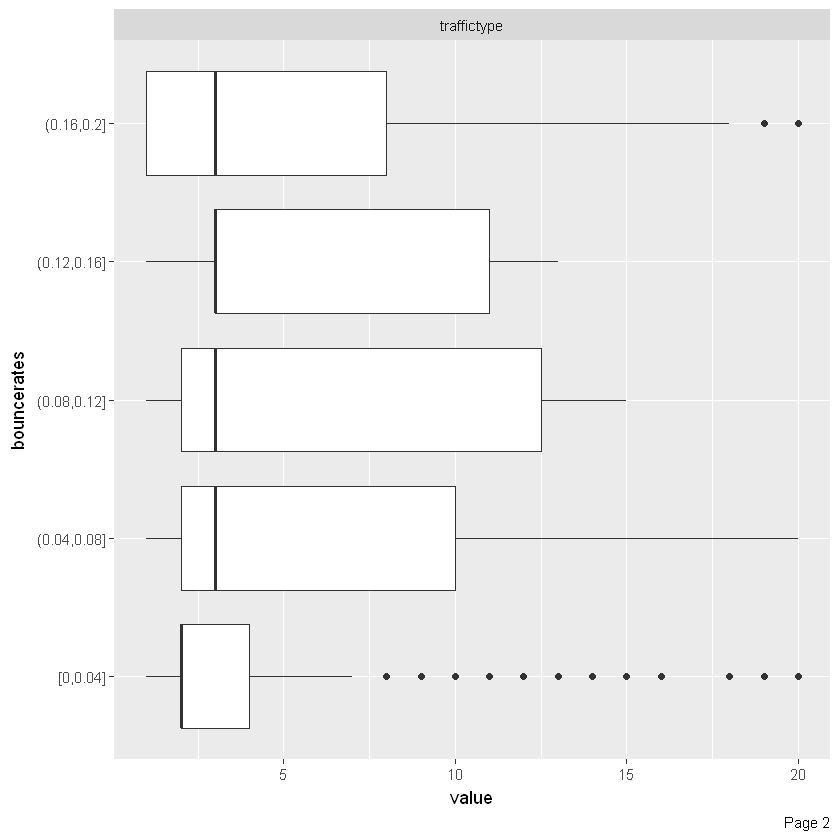

In [0]:
# Checking for outliers on numerical columns

# Selecting only the numerical columns
nums <- unlist(lapply(df, is.numeric))
df1 <- df[,nums]

# Call boxplot function
plot_boxplot(df1,by="bouncerates")

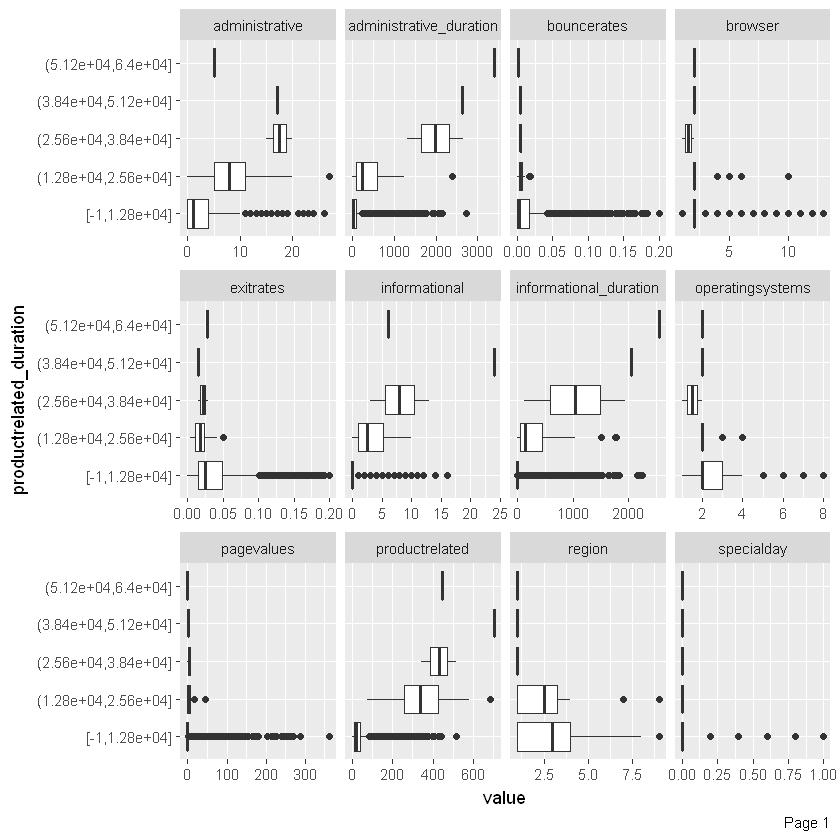

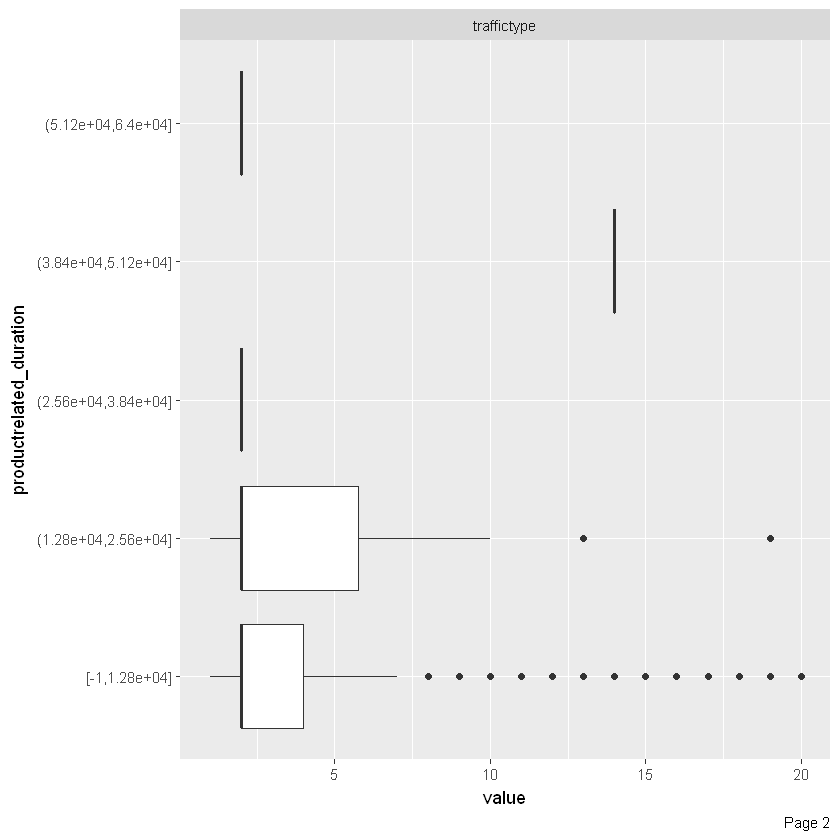

In [0]:
# Checking for outliers on numerical columns

# Selecting only the numerical columns
nums <- unlist(lapply(df, is.numeric))
df1 <- df[,nums]

# Call boxplot function
plot_boxplot(df1,by="productrelated_duration")

There is enough evidence that there is presence of outliers,but we cant remove them so that we can clearly see customers behaviors very well

In [0]:
D <- copy(df)
head(D)

administrative,administrative_duration,informational,informational_duration,productrelated,productrelated_duration,bouncerates,exitrates,pagevalues,specialday,month,operatingsystems,browser,region,traffictype,visitortype,weekend,revenue
0,0,0,0,1,0.000000,0.20000000,0.2000000,0,0,Feb,1,1,1,1,Returning_Visitor,FALSE,FALSE
0,0,0,0,2,64.000000,0.00000000,0.1000000,0,0,Feb,2,2,1,2,Returning_Visitor,FALSE,FALSE
0,-1,0,-1,1,-1.000000,0.20000000,0.2000000,0,0,Feb,4,1,9,3,Returning_Visitor,FALSE,FALSE
0,0,0,0,2,2.666667,0.05000000,0.1400000,0,0,Feb,3,2,2,4,Returning_Visitor,FALSE,FALSE
0,0,0,0,10,627.500000,0.02000000,0.0500000,0,0,Feb,3,3,1,4,Returning_Visitor,TRUE,FALSE
0,0,0,0,19,154.216667,0.01578947,0.0245614,0,0,Feb,2,2,1,3,Returning_Visitor,FALSE,FALSE


# Explorative Data Analysis

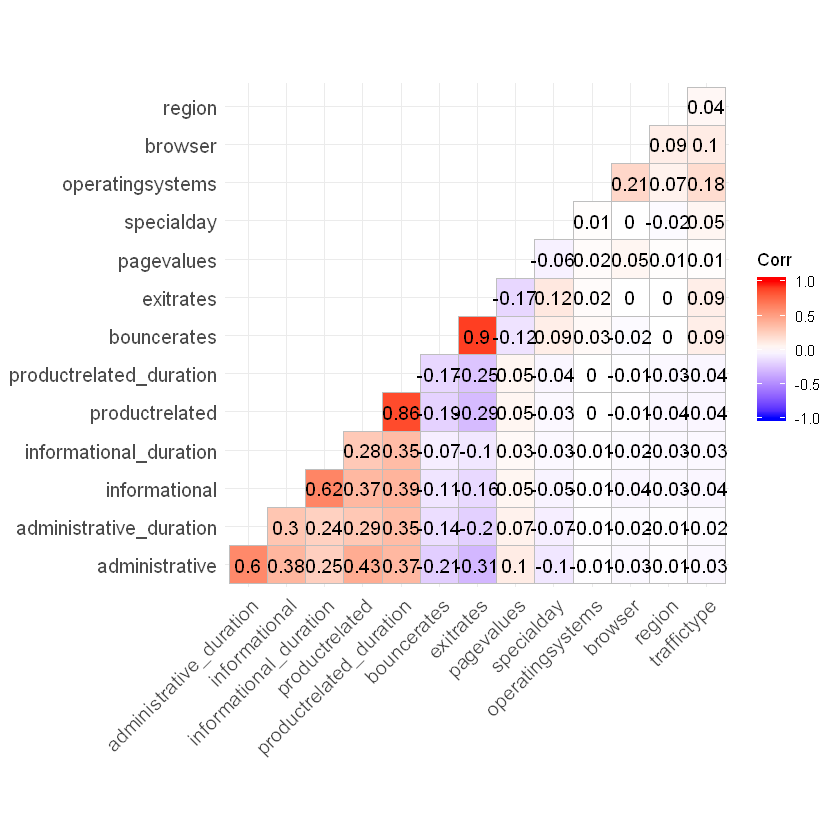

In [0]:
# Plotting heatmap to get more correlation
corr_df <- cor(df1)
col<- colorRampPalette(c("blue", "white", "red"))(20)
ggcorrplot(round(corr_df, 2) ,lab = T,type = 'lower')


The columns that are highly correlated are as follows :
    
    bouncerates and exitrates

    productrelated and productrelated_duration

    informational and informational_duration

    administrative and administrative_duration

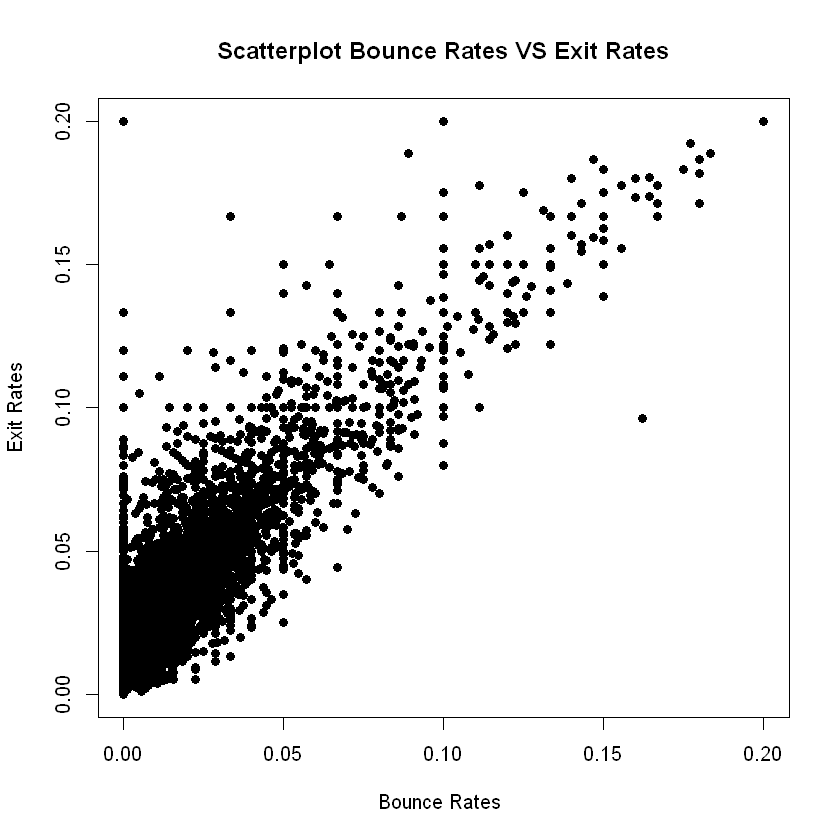

In [0]:
# Plotting a scatter plot between variables that are highly correlated

plot(df$bouncerates, df$exitrates, main="Scatterplot Bounce Rates VS Exit Rates",
   xlab="Bounce Rates ", ylab="Exit Rates", pch=19)

There is a high linear relationship between bounce rates and exit rates

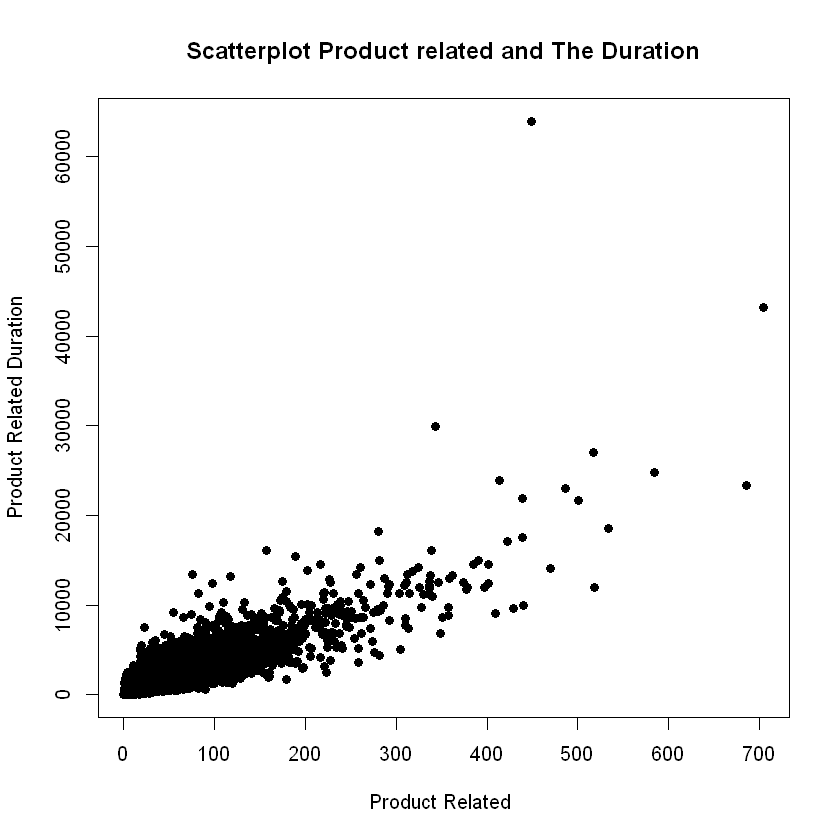

In [0]:
# Plotting a scatter plot between productrelated and productrelated_duration

plot(df$productrelated, df$productrelated_duration, main="Scatterplot Product related and The Duration",
   xlab="Product Related ", ylab="Product Related Duration", pch=19)

There is also linear relationship between productrelated and productrelated_duration

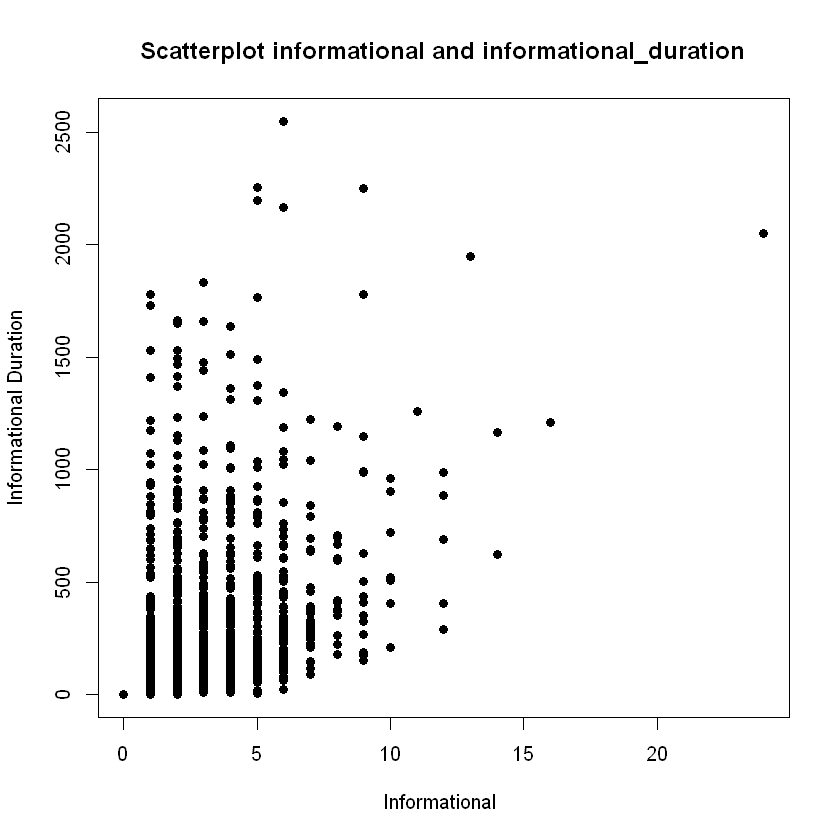

In [0]:
# Plotting a scatter plot between informational and informational_duration

plot(df$informational, df$informational_duration, main="Scatterplot informational and informational_duration",
   xlab="Informational ", ylab="Informational Duration", pch=19)

There is a pattern between informational and informational_duration but the pattern is not linear

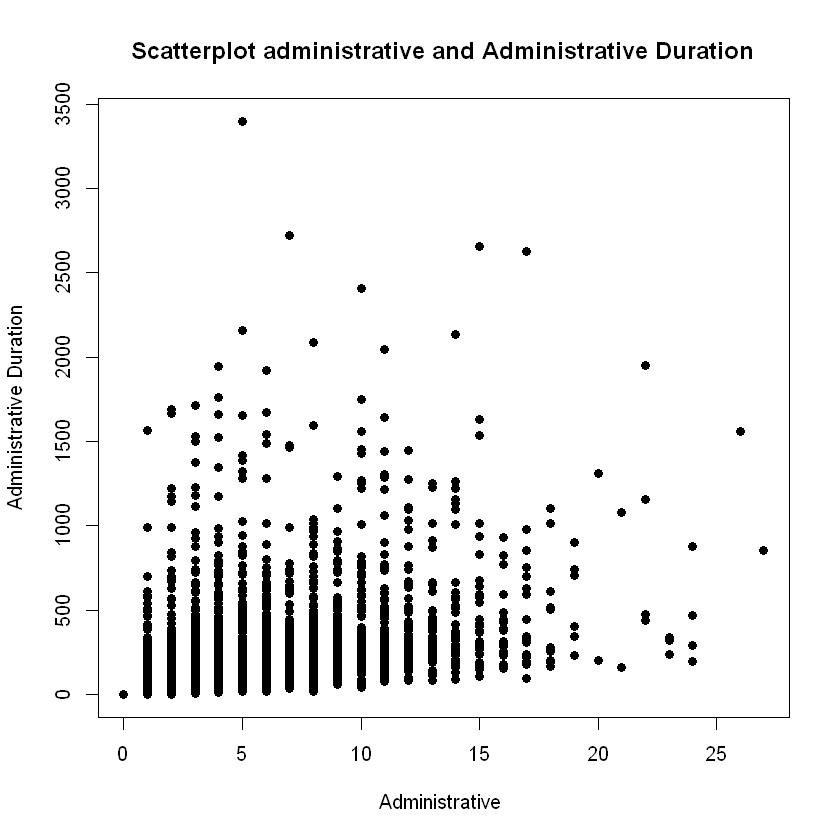

In [0]:
# Plotting a scatter plot between administrative and administrative_duration

plot(df$administrative, df$administrative_duration, main="Scatterplot administrative and Administrative Duration",
   xlab="Administrative ", ylab="Administrative Duration", pch=19)

There is a pattern between  administrative and administrative_duration but the pattern is not linear

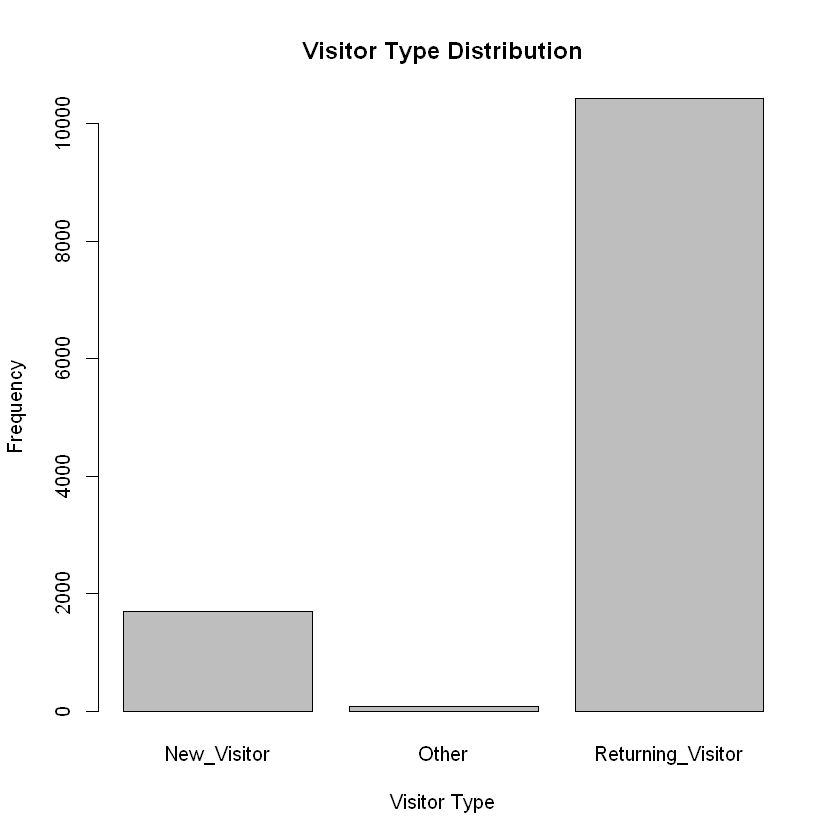

In [0]:
counts <- table(df$visitortype)
barplot(counts, main="Visitor Type Distribution",xlab="Visitor Type",ylab = "Frequency",col="grey")

It is evident that returning visitor has the highest frequency of shopping online compared to new visitor

Other column has the lowest and minimal frequency

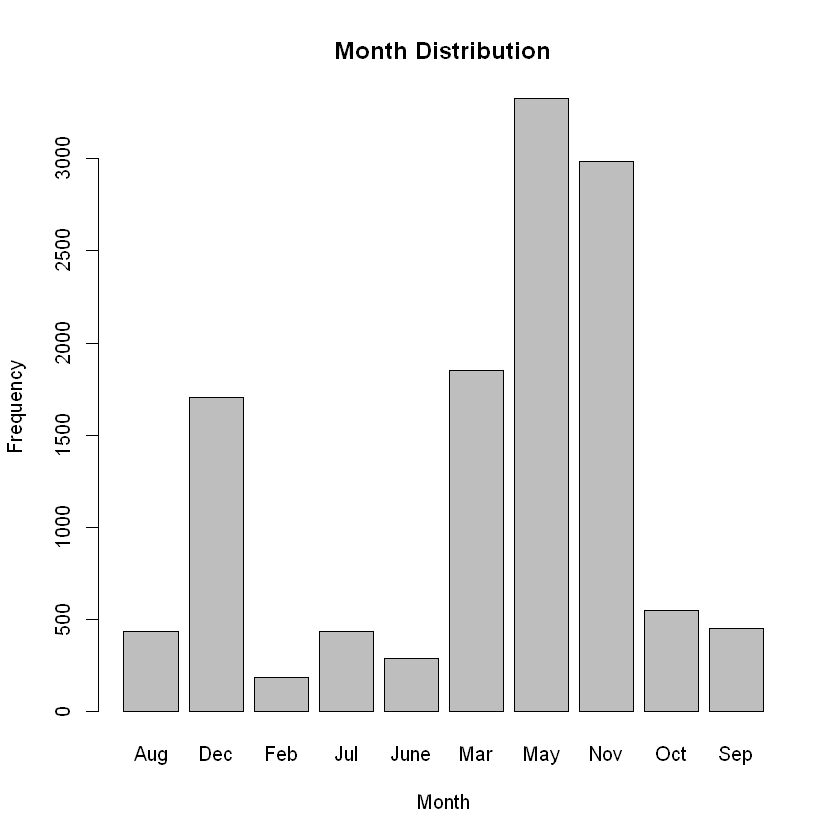

In [0]:
fa <- table(df$month)
barplot(fa, main="Month Distribution",xlab="Month",ylab = "Frequency",col="grey")

May November March and December respectively have the highest online shopping activity 

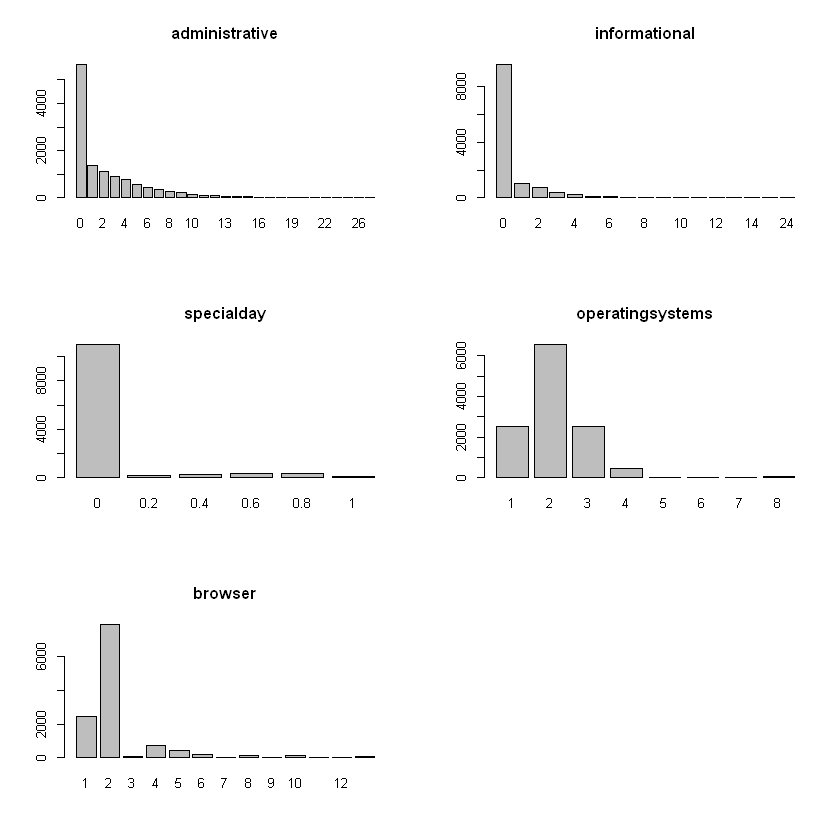

In [0]:
# Plotting categorical columns 

par(mfrow=c(3,2))
barplot(table(df['administrative']),main = 'administrative')
barplot(table(df['informational']),main = 'informational')
barplot(table(df['specialday']),main = 'specialday')
barplot(table(df['operatingsystems']),main = 'operatingsystems')
barplot(table(df['browser']),main = 'browser')


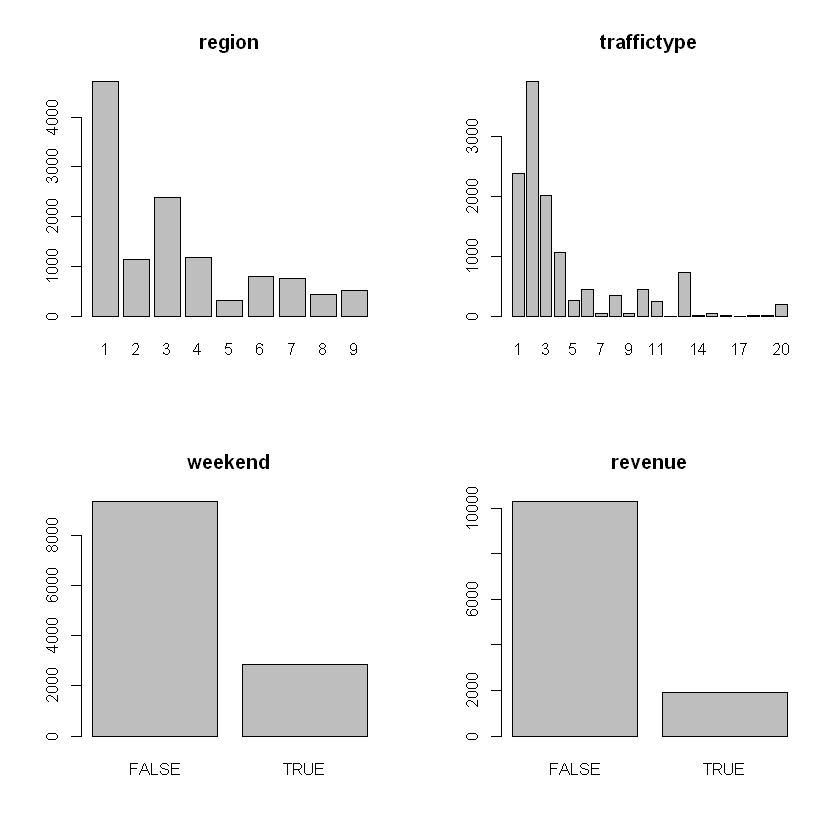

In [0]:
# Plotting the remaining categorical columns
par(mfrow = c(2,2))
barplot(table(df['region']),main = 'region')
barplot(table(df['traffictype']),main = 'traffictype')
barplot(table(df['weekend']),main = 'weekend')
barplot(table(df['revenue']),main = 'revenue')

# Implement the Solution

In [0]:
# Converting categorical columns to factor

cols <- c('specialday','month','operatingsystems','browser','region','traffictype','visitortype','weekend','revenue')
df[cols] <- lapply(df[cols], factor)
glimpse(df)

Observations: 12,199
Variables: 18
$ administrative          <int> 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0...
$ administrative_duration <dbl> 0, 0, -1, 0, 0, 0, -1, -1, 0, 0, 0, 0, 0, 0...
$ informational           <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...
$ informational_duration  <dbl> 0, 0, -1, 0, 0, 0, -1, -1, 0, 0, 0, 0, 0, 0...
$ productrelated          <int> 1, 2, 1, 2, 10, 19, 1, 1, 2, 3, 3, 16, 7, 6...
$ productrelated_duration <dbl> 0.000000, 64.000000, -1.000000, 2.666667, 6...
$ bouncerates             <dbl> 0.200000000, 0.000000000, 0.200000000, 0.05...
$ exitrates               <dbl> 0.200000000, 0.100000000, 0.200000000, 0.14...
$ pagevalues              <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...
$ specialday              <fct> 0, 0, 0, 0, 0, 0, 0.4, 0, 0.8, 0.4, 0, 0.4,...
$ month                   <fct> Feb, Feb, Feb, Feb, Feb, Feb, Feb, Feb, Feb...
$ operatingsystems        <fct> 1, 2, 4, 3, 3, 2, 2, 1, 2, 2, 1, 1, 1, 2, 3...
$ browser        

In [0]:
# Creating dummies on categorical columns

df <- one_hot(as.data.table(df))
head(df)

administrative,administrative_duration,informational,informational_duration,productrelated,productrelated_duration,bouncerates,exitrates,pagevalues,specialday_0,...,traffictype_18,traffictype_19,traffictype_20,visitortype_New_Visitor,visitortype_Other,visitortype_Returning_Visitor,weekend_FALSE,weekend_TRUE,revenue_FALSE,revenue_TRUE
0,0,0,0,1,0.000000,0.20000000,0.2000000,0,1,...,0,0,0,0,0,1,1,0,1,0
0,0,0,0,2,64.000000,0.00000000,0.1000000,0,1,...,0,0,0,0,0,1,1,0,1,0
0,-1,0,-1,1,-1.000000,0.20000000,0.2000000,0,1,...,0,0,0,0,0,1,1,0,1,0
0,0,0,0,2,2.666667,0.05000000,0.1400000,0,1,...,0,0,0,0,0,1,1,0,1,0
0,0,0,0,10,627.500000,0.02000000,0.0500000,0,1,...,0,0,0,0,0,1,0,1,1,0
0,0,0,0,19,154.216667,0.01578947,0.0245614,0,1,...,0,0,0,0,0,1,1,0,1,0


In [0]:
F <- copy(df)
head(F)

administrative,administrative_duration,informational,informational_duration,productrelated,productrelated_duration,bouncerates,exitrates,pagevalues,specialday_0,...,traffictype_18,traffictype_19,traffictype_20,visitortype_New_Visitor,visitortype_Other,visitortype_Returning_Visitor,weekend_FALSE,weekend_TRUE,revenue_FALSE,revenue_TRUE
0,0,0,0,1,0.000000,0.20000000,0.2000000,0,1,...,0,0,0,0,0,1,1,0,1,0
0,0,0,0,2,64.000000,0.00000000,0.1000000,0,1,...,0,0,0,0,0,1,1,0,1,0
0,-1,0,-1,1,-1.000000,0.20000000,0.2000000,0,1,...,0,0,0,0,0,1,1,0,1,0
0,0,0,0,2,2.666667,0.05000000,0.1400000,0,1,...,0,0,0,0,0,1,1,0,1,0
0,0,0,0,10,627.500000,0.02000000,0.0500000,0,1,...,0,0,0,0,0,1,0,1,1,0
0,0,0,0,19,154.216667,0.01578947,0.0245614,0,1,...,0,0,0,0,0,1,1,0,1,0


In [0]:
# Scaling the data that is not dummy variable

df <- cbind( scale(df[,1:9]), df[ ,-c(1:9)] )
head(df)

administrative,administrative_duration,informational,informational_duration,productrelated,productrelated_duration,bouncerates,exitrates,pagevalues,specialday_0,...,traffictype_18,traffictype_19,traffictype_20,visitortype_New_Visitor,visitortype_Other,visitortype_Returning_Visitor,weekend_FALSE,weekend_TRUE,revenue_FALSE,revenue_TRUE
-0.7025315,-0.4601081,-0.3988128,-0.2462725,-0.6963635,-0.6289343,3.954699721,3.4273070,-0.3190356,1,...,0,0,0,0,0,1,1,0,1,0
-0.7025315,-0.4601081,-0.3988128,-0.2462725,-0.6739424,-0.5955997,-0.450343788,1.2650121,-0.3190356,1,...,0,0,0,0,0,1,1,0,1,0
-0.7025315,-0.4657410,-0.3988128,-0.2533417,-0.6963635,-0.6294551,3.954699721,3.4273070,-0.3190356,1,...,0,0,0,0,0,1,1,0,1,0
-0.7025315,-0.4601081,-0.3988128,-0.2462725,-0.6739424,-0.6275453,0.650917089,2.1299300,-0.3190356,1,...,0,0,0,0,0,1,1,0,1,0
-0.7025315,-0.4601081,-0.3988128,-0.2462725,-0.4945739,-0.3020990,-0.009839437,0.1838646,-0.3190356,1,...,0,0,0,0,0,1,0,1,1,0
-0.7025315,-0.4601081,-0.3988128,-0.2462725,-0.2927843,-0.5486101,-0.102577188,-0.3661929,-0.3190356,1,...,0,0,0,0,0,1,1,0,1,0


In [0]:
class(df)

[1] "data.table" "data.frame"

# Hierachichal clustering

In [0]:
df4 <- df[1:200,]
head(df4)
dim(df4)

administrative,administrative_duration,informational,informational_duration,productrelated,productrelated_duration,bouncerates,exitrates,pagevalues,specialday_0,...,traffictype_18,traffictype_19,traffictype_20,visitortype_New_Visitor,visitortype_Other,visitortype_Returning_Visitor,weekend_FALSE,weekend_TRUE,revenue_FALSE,revenue_TRUE
-0.7025315,-0.4601081,-0.3988128,-0.2462725,-0.6963635,-0.6289343,3.954699721,3.4273070,-0.3190356,1,...,0,0,0,0,0,1,1,0,1,0
-0.7025315,-0.4601081,-0.3988128,-0.2462725,-0.6739424,-0.5955997,-0.450343788,1.2650121,-0.3190356,1,...,0,0,0,0,0,1,1,0,1,0
-0.7025315,-0.4657410,-0.3988128,-0.2533417,-0.6963635,-0.6294551,3.954699721,3.4273070,-0.3190356,1,...,0,0,0,0,0,1,1,0,1,0
-0.7025315,-0.4601081,-0.3988128,-0.2462725,-0.6739424,-0.6275453,0.650917089,2.1299300,-0.3190356,1,...,0,0,0,0,0,1,1,0,1,0
-0.7025315,-0.4601081,-0.3988128,-0.2462725,-0.4945739,-0.3020990,-0.009839437,0.1838646,-0.3190356,1,...,0,0,0,0,0,1,0,1,1,0
-0.7025315,-0.4601081,-0.3988128,-0.2462725,-0.2927843,-0.5486101,-0.102577188,-0.3661929,-0.3190356,1,...,0,0,0,0,0,1,1,0,1,0


[1] 200  82

In [0]:
# calculating the distances using euclidean distances

d <- dist(df4,method ="euclidean")
d

               1            2            3            4            5
2    5.484664213                                                    
3    2.449506476  5.664067287                                       
4    4.538575907  2.821680197  4.538585097                          
5    5.863874958  3.079162163  6.032035474  3.218984033             
6    6.084526698  2.220193836  6.084540311  3.598596313  2.900456903
7    3.162290621  5.664067287  2.828427125  4.753814751  6.195599403
8    2.467836331  5.492885618  3.176497156  4.548504025  5.698735486
9    5.837876474  2.449530112  5.664000687  2.821556024  3.672831661
10   6.506237346  2.636691649  6.658198465  4.224412784  3.253114580
11   5.635670423  2.923991691  5.635696710  3.430659804  3.219195076
12   6.023086785  3.587895399  6.023111956  4.087893304  3.507851075
13   5.931623070  2.900129736  6.097900164  3.879634210  2.906187559
14   5.807892532  2.127876644  5.807904167  3.426029004  2.899659279
15   5.664069630  2.449490629  5.4

In [0]:
# Perfoming hierachichal clustering

res.hc <- hclust(d,method = "ward.D2")
res.hc


Call:
hclust(d = d, method = "ward.D2")

Cluster method   : ward.D2 
Distance         : euclidean 
Number of objects: 200 


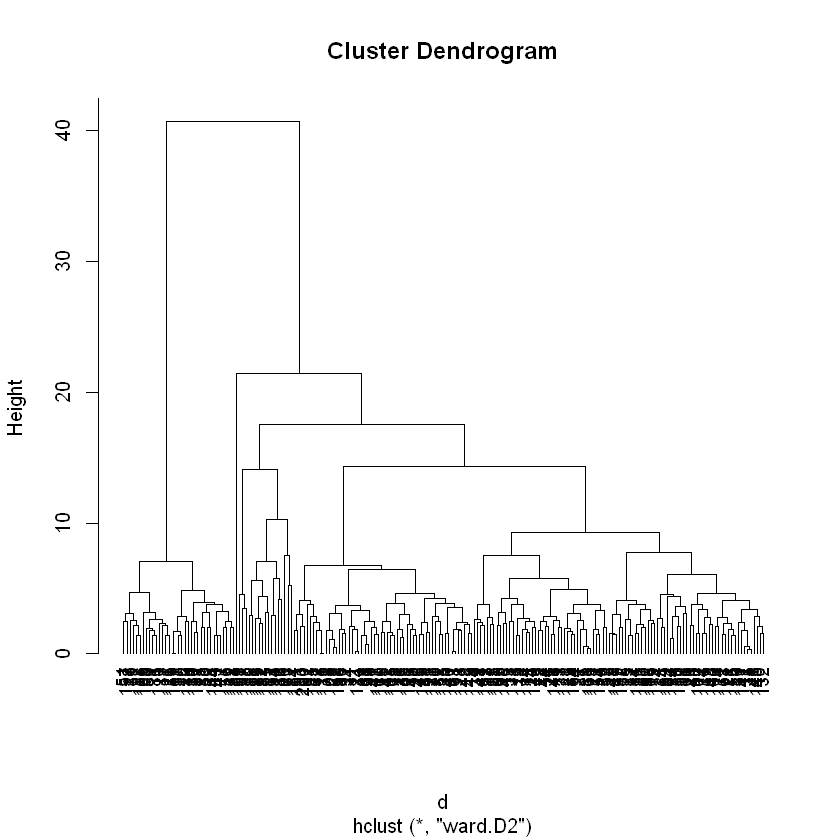

In [0]:
# Plotting hierachichal clusters

plot(res.hc,cex=0.9,hang=-1)

# Kmeans Clustering

In [0]:
# Perfoming clustering with centers 2,3,4,5,6 to try and find out the most apprpriate centroid

df_k2 <- kmeans(df,centers = 2,nstart = 25)
df_k3 <- kmeans(df,centers = 3,nstart = 25)
df_k4 <- kmeans(df,centers = 4,nstart = 25)
df_k5 <- kmeans(df,centers = 5,nstart = 25)
df_k6 <- kmeans(df,centers = 6,nstart = 25)

Warning message:
"did not converge in 10 iterations"

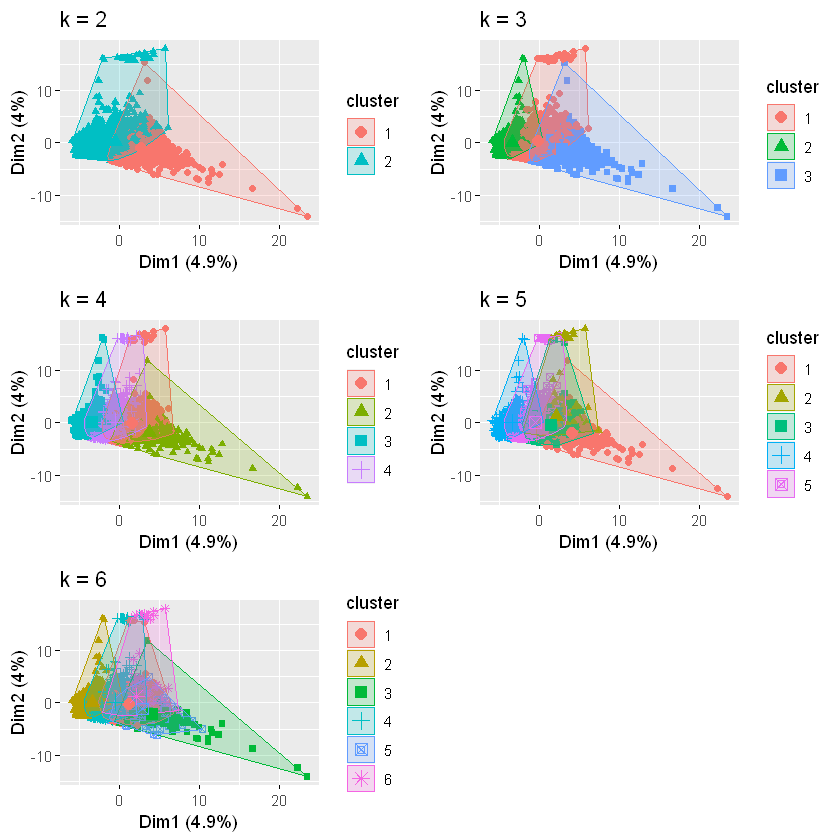

In [0]:
# Plotting the  2,3,4,5,6 trial clusters inorder to see and visualize how clusters look like

p2 <- fviz_cluster(df_k2,geom = 'point',data = df)+ggtitle("k = 2")
p3 <- fviz_cluster(df_k3,geom ="point", data = df)+ggtitle("k = 3")
p4 <- fviz_cluster(df_k4,geom ="point", data = df)+ggtitle("k = 4")
p5 <- fviz_cluster(df_k5,geom ="point", data = df)+ggtitle("k = 5")
p6 <- fviz_cluster(df_k6,geom ="point", data = df)+ggtitle("k = 6")

grid.arrange(p2,p3,p4,p5,p6,ncol=2)

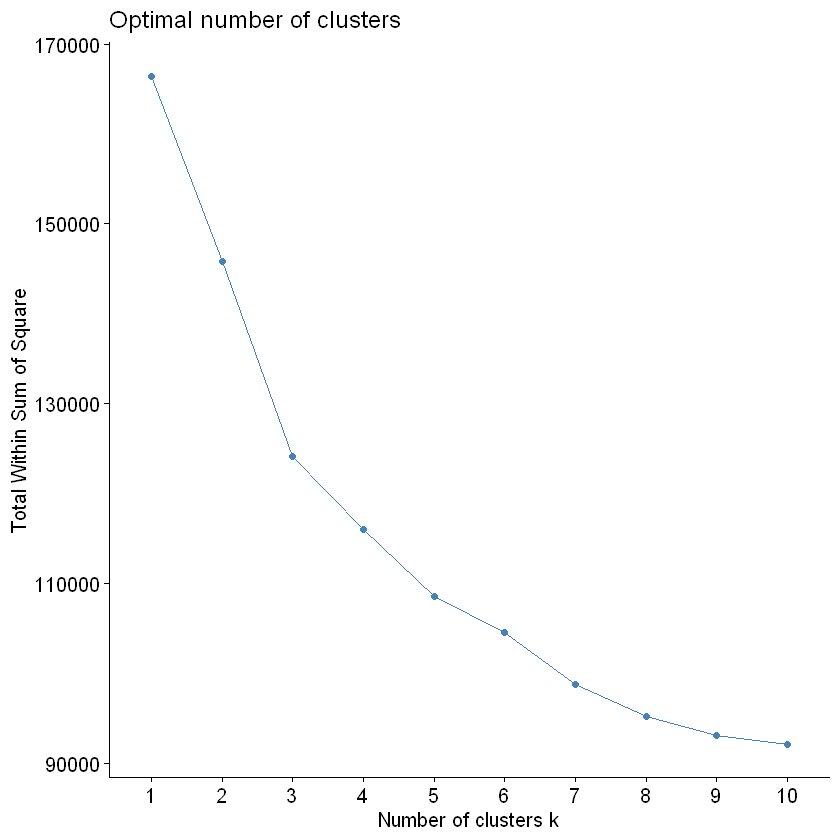

In [0]:
# Optimizing a better way of finding the most optimal clusters using elbow method

fviz_nbclust(x = df,FUNcluster = kmeans,method = 'wss')

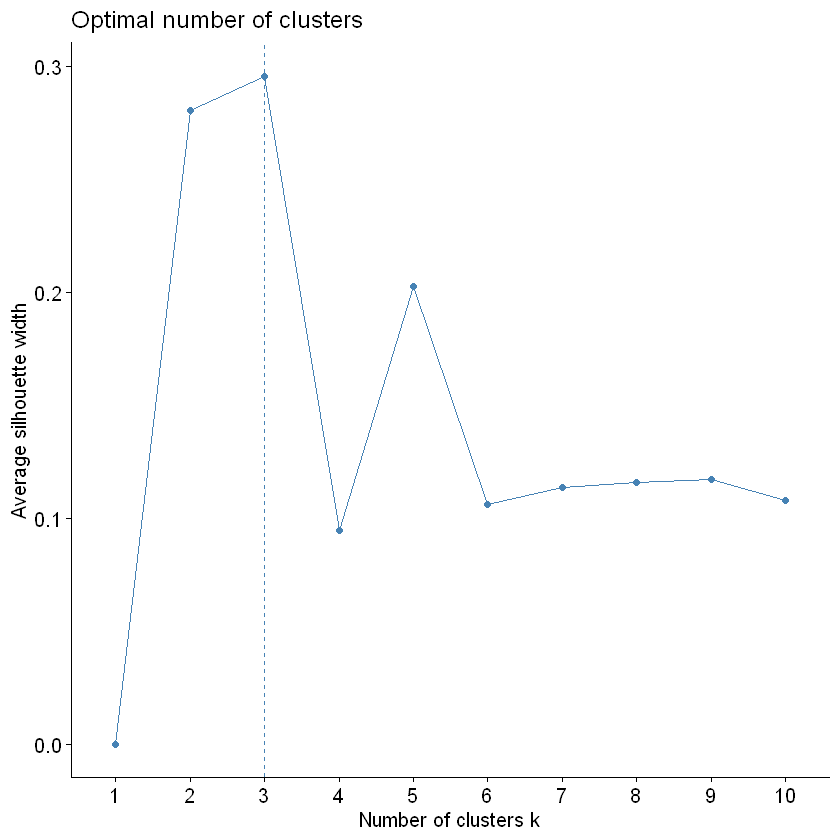

In [0]:
# Also optimizing a better way of finding the most optimal clusters using silhouette method

fviz_nbclust(x = df,FUNcluster = kmeans,method = 'silhouette')

In [0]:
# After finding out the most optimal clusters we use it as our final predictor variable for clustering

set.seed(123)
final <- kmeans(df,centers = 3,nstart = 25)
print(final)

K-means clustering with 3 clusters of sizes 9627, 936, 1636

Cluster means:
  administrative administrative_duration informational informational_duration
1     -0.1888427              -0.1718953    -0.2286491             -0.1878514
2     -0.6861732              -0.4509951    -0.3854143             -0.2458103
3      1.5038180               1.2695398     1.5659856              1.2460415
  productrelated productrelated_duration bouncerates  exitrates   pagevalues
1     -0.1845171              -0.1749950  -0.2494493 -0.2045597 -0.004144664
2     -0.6434967              -0.5939212   3.1113587  2.9391062 -0.319035624
3      1.4539483               1.3695522  -0.3122146 -0.4778162  0.206918106
  specialday_0 specialday_0.2 specialday_0.4 specialday_0.6 specialday_0.8
1    0.8987223    0.014230809     0.01911291     0.02825387     0.02638413
2    0.8002137    0.026709402     0.04273504     0.06089744     0.05341880
3    0.9468215    0.009779951     0.01161369     0.01283619     0.01222494
  sp

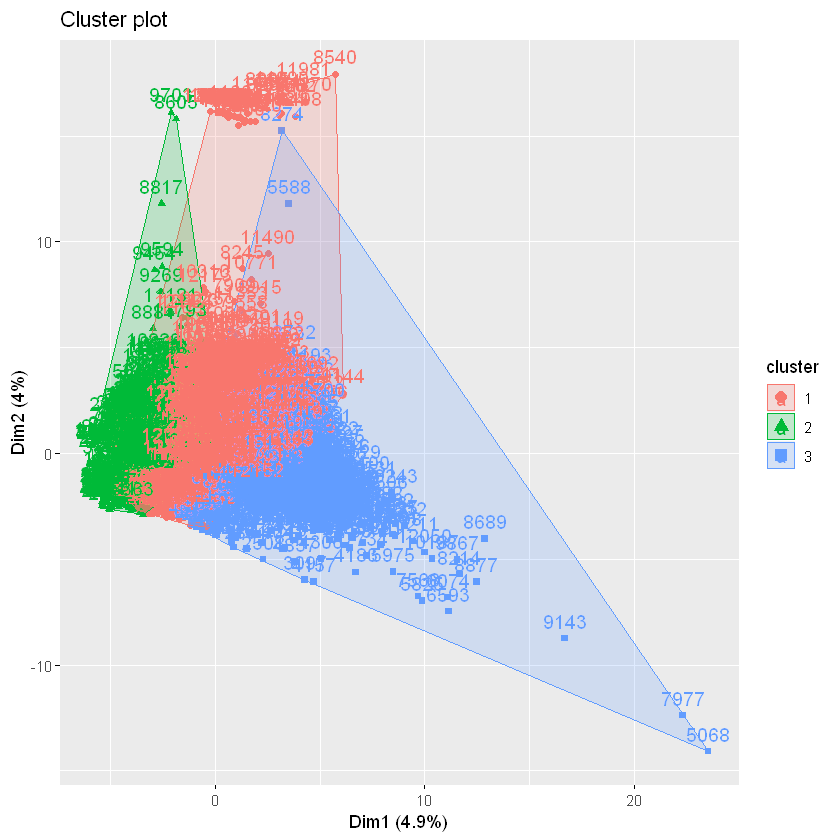

In [0]:
# Visualizing the most optimal cluster

fviz_cluster(final,data=df)

In [0]:
# Embending the created cluster to the dataframe

df %>%
    mutate(cluster = final$cluster)%>%
    group_by(cluster)%>%
    summarize_all('median')
    

cluster,administrative,administrative_duration,informational,informational_duration,productrelated,productrelated_duration,bouncerates,exitrates,pagevalues,...,traffictype_18,traffictype_19,traffictype_20,visitortype_New_Visitor,visitortype_Other,visitortype_Returning_Visitor,weekend_FALSE,weekend_TRUE,revenue_FALSE,revenue_TRUE
1,-0.4023079,-0.4375764,-0.3988128,-0.2462725,-0.3376265,-0.3373260,-0.4503438,-0.3567091,-0.3190356,...,0,0,0,0,0,1,1,0,1,0
2,-0.7025315,-0.4601081,-0.3988128,-0.2462725,-0.6739424,-0.6289343,3.9546997,3.4273070,-0.3190356,...,0,0,0,0,0,1,1,0,1,0
3,1.3990334,0.6550710,1.1688099,0.4040949,0.9852165,0.8355972,-0.3607487,-0.5205767,-0.2140890,...,0,0,0,0,0,1,1,0,1,0


# PCA

In [0]:
# creating differnt dimensions using pca 

df.pca <- prcomp(df,center = T,scale. = T)
summary(df.pca)

Importance of components:
                           PC1     PC2     PC3     PC4     PC5     PC6     PC7
Standard deviation     2.01364 1.80685 1.71836 1.59750 1.55418 1.48060 1.42792
Proportion of Variance 0.04945 0.03981 0.03601 0.03112 0.02946 0.02673 0.02487
Cumulative Proportion  0.04945 0.08926 0.12527 0.15639 0.18585 0.21258 0.23745
                           PC8    PC9    PC10    PC11    PC12    PC13    PC14
Standard deviation     1.40313 1.3613 1.23695 1.21404 1.19834 1.16020 1.14285
Proportion of Variance 0.02401 0.0226 0.01866 0.01797 0.01751 0.01642 0.01593
Cumulative Proportion  0.26146 0.2841 0.30272 0.32069 0.33820 0.35462 0.37055
                          PC15    PC16   PC17    PC18    PC19    PC20    PC21
Standard deviation     1.12912 1.09476 1.0867 1.08344 1.07358 1.06662 1.06156
Proportion of Variance 0.01555 0.01462 0.0144 0.01432 0.01406 0.01387 0.01374
Cumulative Proportion  0.38609 0.40071 0.4151 0.42943 0.44348 0.45736 0.47110
                          PC22   P

There are 82 principal components.

In [0]:
str(df.pca)

List of 5
 $ sdev    : num [1:82] 2.01 1.81 1.72 1.6 1.55 ...
 $ rotation: num [1:82, 1:82] 0.29 0.237 0.24 0.199 0.298 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:82] "administrative" "administrative_duration" "informational" "informational_duration" ...
  .. ..$ : chr [1:82] "PC1" "PC2" "PC3" "PC4" ...
 $ center  : Named num [1:82] -4.04e-17 4.59e-17 -1.99e-17 2.65e-17 6.47e-17 ...
  ..- attr(*, "names")= chr [1:82] "administrative" "administrative_duration" "informational" "informational_duration" ...
 $ scale   : Named num [1:82] 1 1 1 1 1 ...
  ..- attr(*, "names")= chr [1:82] "administrative" "administrative_duration" "informational" "informational_duration" ...
 $ x       : num [1:12199, 1:82] -4.41 -1.46 -4.43 -2.96 -2.18 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : NULL
  .. ..$ : chr [1:82] "PC1" "PC2" "PC3" "PC4" ...
 - attr(*, "class")= chr "prcomp"


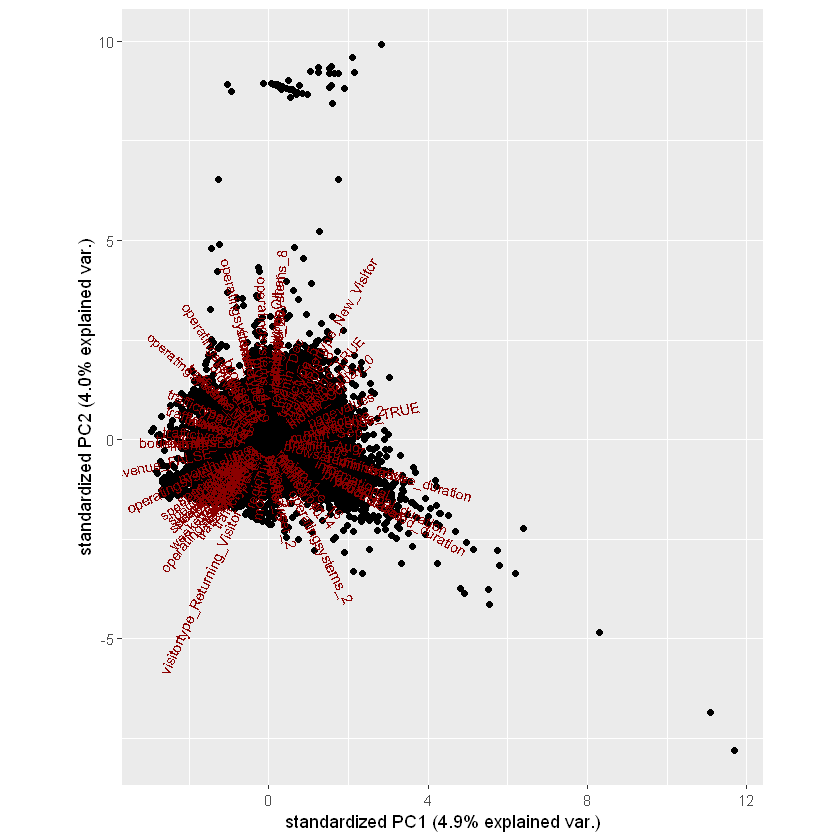

In [0]:
ggbiplot(df.pca,ellipse=TRUE)

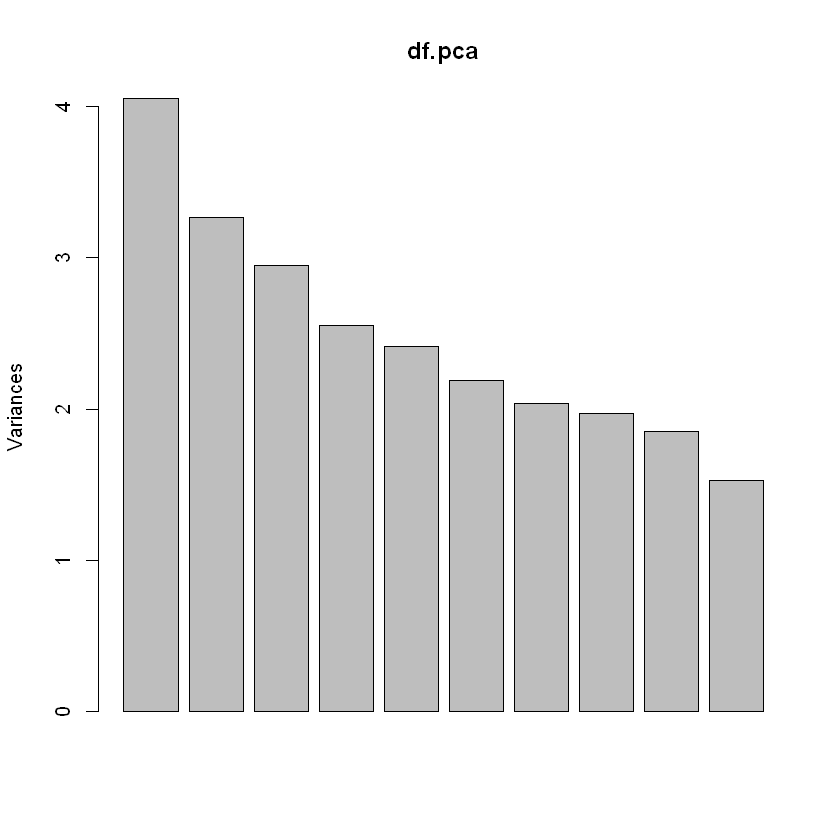

In [0]:
plot(df.pca)

The principal components have a maximum variance of 4 

In [0]:
dim(df.pca$x)

[1] 12199    82

In [0]:
df_pca <- as.data.frame(df.pca$x)
head(df_pca)

PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC73,PC74,PC75,PC76,PC77,PC78,PC79,PC80,PC81,PC82
-4.409046,1.4668046,2.1252202,-1.8931166,1.04891050,2.1977912,0.01172108,1.66642781,-0.859103685,-0.9163447,...,2.047376e-15,-1.631532e-15,-7.333472e-16,1.340011e-15,-2.940316e-16,1.507745e-16,6.066750e-16,-1.390459e-15,-4.213751e-16,-8.396335e-16
-1.460090,-0.4584452,-0.5133225,0.7238538,-0.09358451,1.2842597,0.27025157,-0.08044194,-0.001828075,-2.2281171,...,1.631043e-15,-1.534387e-15,-8.721251e-16,7.293883e-16,-6.270985e-16,-1.181493e-15,3.013637e-16,-2.524803e-16,-1.323431e-15,-6.175889e-16
-4.428724,2.0897967,0.7060286,-2.2792147,0.61941494,1.8998125,0.08005003,1.55722877,-0.844167282,-1.0388897,...,2.796777e-15,-1.298465e-15,1.270757e-16,1.867367e-15,-7.103652e-16,-2.933147e-16,7.454529e-16,-1.418215e-15,3.002699e-16,-6.731001e-16
-2.960673,-0.6196639,-0.4079631,-0.1168443,0.50528425,-0.4236909,-0.05388671,0.72279960,-1.191991929,1.0217910,...,3.018821e-15,-1.832760e-15,7.156451e-17,2.700034e-15,-3.217872e-16,-1.125982e-15,7.732085e-16,-4.745249e-16,-1.934054e-15,1.595672e-16
-2.181726,0.3396952,1.3244492,-0.3200308,0.86219242,-3.0492137,-0.20480065,0.49630163,-0.050093455,-0.5742180,...,1.603287e-15,-1.367854e-15,7.932095e-16,2.242067e-15,-4.900553e-16,-2.170286e-15,1.661387e-15,-1.008820e-15,-4.085111e-15,-1.519645e-15
-1.634116,-0.6467077,-0.4600879,0.2071309,-0.23965197,1.4919220,0.21849115,0.04524515,0.287234151,-2.1472763,...,2.047376e-15,-1.825821e-15,-1.227245e-16,1.034700e-15,-9.974255e-17,-1.125982e-15,-3.947650e-18,1.360977e-16,-7.544420e-16,-1.061678e-15


# Tsne 

In [0]:
rt <- Rtsne(df,dims = 2,perplexity = 30,verbose = 1,max_iter = 500)
time <- system.time(rt)

Performing PCA
Read the 12199 x 50 data matrix successfully!
OpenMP is working. 1 threads.
Using no_dims = 2, perplexity = 30.000000, and theta = 0.500000
Computing input similarities...
Building tree...
 - point 10000 of 12199
Done in 17.49 seconds (sparsity = 0.010897)!
Learning embedding...
Iteration 50: error is 99.180497 (50 iterations in 3.02 seconds)
Iteration 100: error is 96.553020 (50 iterations in 8.52 seconds)
Iteration 150: error is 94.332419 (50 iterations in 4.19 seconds)
Iteration 200: error is 94.225760 (50 iterations in 3.79 seconds)
Iteration 250: error is 94.199052 (50 iterations in 4.55 seconds)
Iteration 300: error is 3.674137 (50 iterations in 2.46 seconds)
Iteration 350: error is 3.295581 (50 iterations in 2.28 seconds)
Iteration 400: error is 3.080540 (50 iterations in 2.37 seconds)
Iteration 450: error is 2.936175 (50 iterations in 2.32 seconds)
Iteration 500: error is 2.830982 (50 iterations in 2.64 seconds)
Fitting performed in 36.14 seconds.


In [0]:
colors <- rainbow(length(unique(D$revenue)))
names(colors) <- unique(D$revenue)

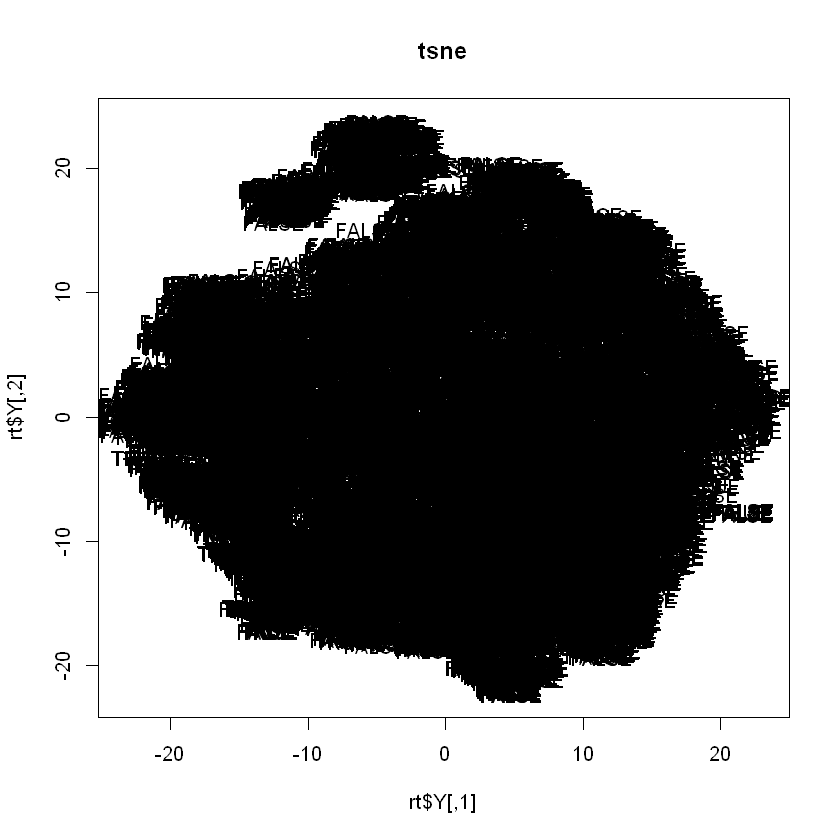

In [0]:
plot(rt$Y,t='n',main="tsne")
text(rt$Y,labels = D$revenue,col=colors[D$revenue])